# --- 1. Carregamento do Dataset ---

In [4]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
# Arquivo 'results.csv' carregado diretamente do GitHub em uma variável 'url'.

url = 'https://raw.githubusercontent.com/moises-rb/projeto_futebol_preditivo/refs/heads/main/02_measure/data/results.csv'
try:
    df = pd.read_csv(url)
    print("\nDataset 'results.csv' carregado com sucesso da URL!")
    print("Primeiras 5 linhas do dataset:")
    print(df.head())
    print("\nInformações básicas do dataset:")
    df.info()
except Exception as e: # Captura uma exceção mais genérica para problemas de URL/rede
    print(f"\nErro ao carregar o arquivo da URL: {e}")
    print("Por favor, verifique se a URL está correta e se o arquivo está acessível.")


Dataset 'results.csv' carregado com sucesso da URL!
Primeiras 5 linhas do dataset:
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  

Informações básicas do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48335 entries, 0 to 48334
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48335 non-null  object
 1   home_team   48335 non-nul

# --- 2. Primeiras Etapas de Limpeza e Tratamento de Valores Ausentes ---

In [ ]:
print("\n--- Verificando valores ausentes ---")
print(df.isnull().sum())

# Para este dataset específico, as colunas de score não devem ter NaN.
# Se houver, podemos preenchê-las com 0 ou investigar. Para fins de demonstração,
# vamos assumir que não há NaNs críticos nas colunas de score.
# Se houvesse, um tratamento como: df['home_score'].fillna(0, inplace=True) seria necessário.


--- Verificando valores ausentes ---
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


# --- 3. Criação da Variável 'result' (Vitória, Empate, Derrota) ---

In [ ]:
# Esta é a nossa variável dependente que queremos prever.
def get_match_result(row):
    """
    Determina o resultado de uma partida com base nos scores do time da casa e visitante.
    Retorna 'Home Win', 'Away Win' ou 'Draw'.
    """
    if row['home_score'] > row['away_score']:
        return 'Home Win'
    elif row['home_score'] < row['away_score']:
        return 'Away Win'
    else:
        return 'Draw'

In [9]:
# Aplicando a função para criar a nova coluna 'result'
df['result'] = df.apply(get_match_result, axis=1)
print("\nVariável 'result' criada com sucesso!")
print("Contagem de cada tipo de resultado:")
print(df['result'].value_counts())


Variável 'result' criada com sucesso!
Contagem de cada tipo de resultado:
result
Home Win    23703
Away Win    13640
Draw        10992
Name: count, dtype: int64


# --- 4. Início da Análise Exploratória de Dados (EDA) com Visualizações Básicas ---

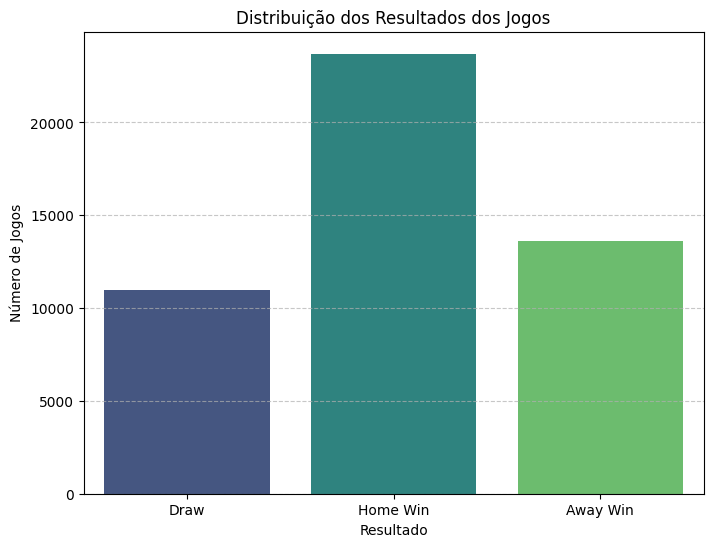

In [11]:
# Distribuição dos resultados
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=df, palette='viridis', hue='result')
plt.title('Distribuição dos Resultados dos Jogos')
plt.xlabel('Resultado')
plt.ylabel('Número de Jogos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

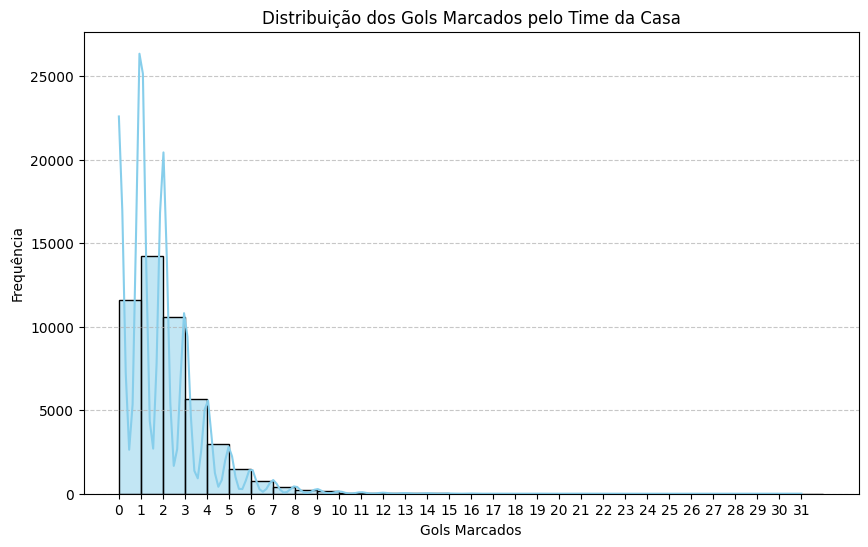

In [12]:
# Distribuição dos gols do time da casa
plt.figure(figsize=(10, 6))
sns.histplot(df['home_score'], bins=range(0, df['home_score'].max() + 2), kde=True, color='skyblue')
plt.title('Distribuição dos Gols Marcados pelo Time da Casa')
plt.xlabel('Gols Marcados')
plt.ylabel('Frequência')
plt.xticks(range(0, df['home_score'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

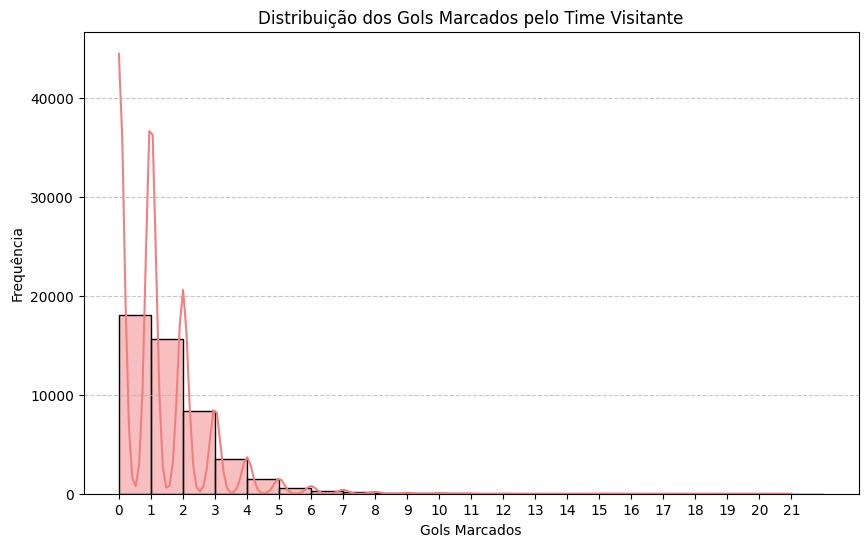

In [13]:
# Distribuição dos gols do time visitante
plt.figure(figsize=(10, 6))
sns.histplot(df['away_score'], bins=range(0, df['away_score'].max() + 2), kde=True, color='lightcoral')
plt.title('Distribuição dos Gols Marcados pelo Time Visitante')
plt.xlabel('Gols Marcados')
plt.ylabel('Frequência')
plt.xticks(range(0, df['away_score'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

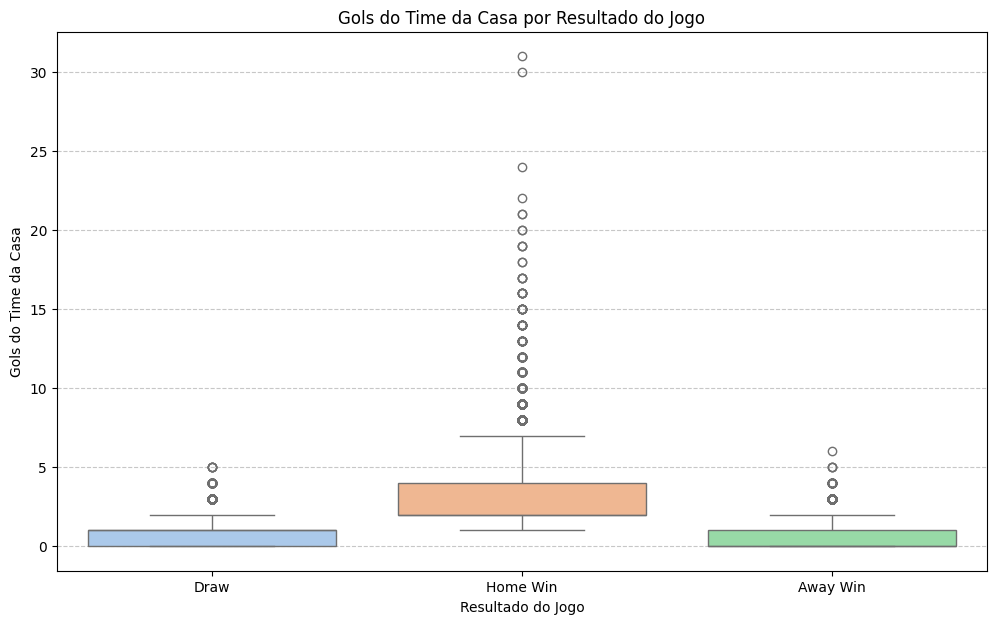

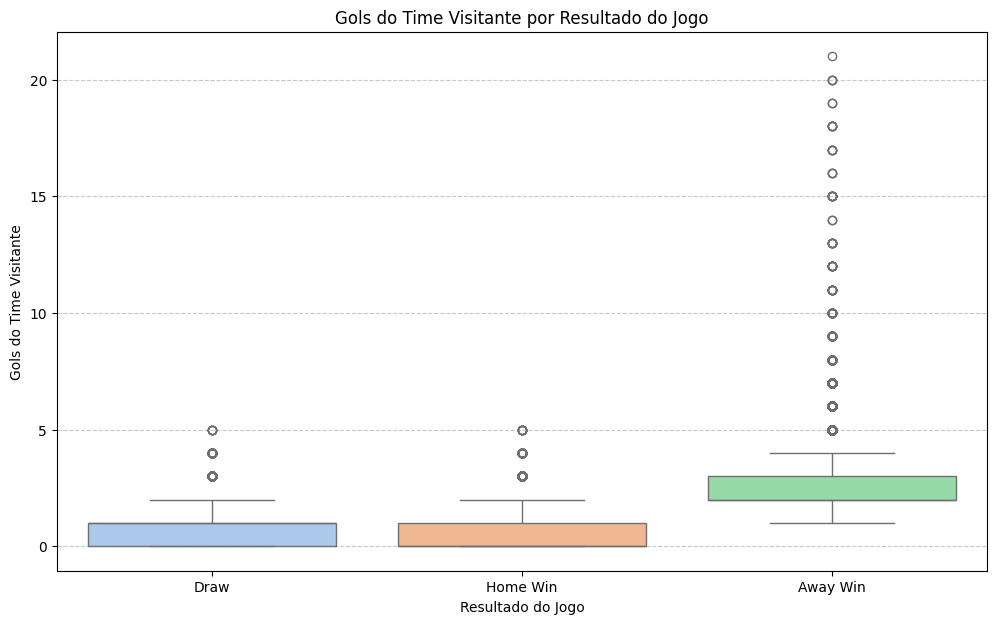

In [16]:
# Comparação de gols médios por tipo de resultado
plt.figure(figsize=(12, 7))
sns.boxplot(x='result', y='home_score', data=df, palette='pastel', hue='result')
plt.title('Gols do Time da Casa por Resultado do Jogo')
plt.xlabel('Resultado do Jogo')
plt.ylabel('Gols do Time da Casa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='result', y='away_score', data=df, palette='pastel', hue='result')
plt.title('Gols do Time Visitante por Resultado do Jogo')
plt.xlabel('Resultado do Jogo')
plt.ylabel('Gols do Time Visitante')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Salvar o dataset processado para a próxima fase ---

In [19]:
# É uma boa prática salvar o dataframe após as etapas iniciais de limpeza e engenharia de features básicas.
# Isso evita reprocessar tudo a cada vez.

# Importar o módulo 'os' para manipulação de diretórios, caso não tenha sido executado anteriormente.
# Embora 'os' seja importado no início do notebook, esta importação local garante
# que a funcionalidade esteja disponível se esta célula for executada isoladamente.
import os

output_dir = '../data/processed/'
# Verifica se o diretório de saída existe, se não, o cria
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Diretório '{output_dir}' criado com sucesso.")

output_path = os.path.join(output_dir, 'cleaned_data.csv')
df.to_csv(output_path, index=False)
print(f"\nDataset processado salvo em: {output_path}")

print("\nFase MEASURE (Coleta e Limpeza de Dados Iniciais) concluída neste notebook.")
print("Pronto para aprofundar na Análise (Fase ANALYZE)!")

Diretório '../data/processed/' criado com sucesso.

Dataset processado salvo em: ../data/processed/cleaned_data.csv

Fase MEASURE (Coleta e Limpeza de Dados Iniciais) concluída neste notebook.
Pronto para aprofundar na Análise (Fase ANALYZE)!
